### scikit-mobility tutorials

# 3 - Trajectory models

Generative models of individual trajectories.

- [Density EPR](#Density-EPR)
- [Ditras](#Ditras)

In [1]:
%matplotlib inline
import skmob as sm
from skmob.utils import utils, plot, constants

from geopy.distance import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploration and Preferential Return EPR

### Density EPR

In [45]:
from skmob.models.epr import DensityEPR
from skmob.models.epr import load_spatial_tessellation, compute_od_matrix

In [46]:
start_time, end_time = pd.to_datetime('2019/01/01 08:00:00'), pd.to_datetime('2019/01/14 08:00:00')
sepr = DensityEPR()

In [4]:
spatial_tessellation = load_spatial_tessellation('../data_test/location2info_trentino')

6259it [00:00, 201351.04it/s]


In [5]:
od_matrix = compute_od_matrix(spatial_tessellation, use_relevance=True)

100%|██████████| 6256/6256 [02:02<00:00, 51.18it/s]


In [48]:
tdf = sepr.generate(start_time, end_time, spatial_tessellation, n_agents=1, od_matrix=od_matrix, verbose=True)



100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

In [7]:
tdf.parameters

{'model': {'class': <function skmob.models.epr.DensityEPR.__init__(self, name='Density EPR model', rho=0.6, gamma=0.21, beta=0.8, tau=17, min_wait_time_minutes=10)>,
  'generate': {'start_date': Timestamp('2019-01-01 08:00:00'),
   'end_date': Timestamp('2019-01-14 08:00:00'),
   'n_agents': 100,
   'starting_location': None,
   'random_state': None,
   'verbose': True}}}

In [8]:
tdf.head()

,uid,datetime,lat,lng
0,1,2019-01-01 08:00:00.000000,45.701431,11.138802
1,1,2019-01-01 08:15:48.088279,45.701431,11.138802
2,1,2019-01-01 08:26:07.106896,45.892660,11.017235
3,1,2019-01-01 08:53:17.810057,45.865675,11.016259
4,1,2019-01-01 09:19:03.452232,45.892660,11.017235


In [12]:
from skmob.preprocessing import detection, clustering
from skmob.utils import plot

In [49]:
an_agent = tdf[tdf.uid == 1]
# an_agent.plot_trajectory(hex_color='#000000')

In [50]:
s_an_agent = detection.stops(an_agent)
c_an_agent = clustering.cluster(s_an_agent)

In [51]:
map_s_an_agent = an_agent.plot_trajectory(hex_color='#666666')
plot.plot_stops(c_an_agent, map_f=map_s_an_agent)

In [59]:
drange = ((c_an_agent['datetime'] > pd.to_datetime('2019/01/01 08:00:00')) &
          (c_an_agent['datetime'] < pd.to_datetime('2019/01/07 08:00:00')))


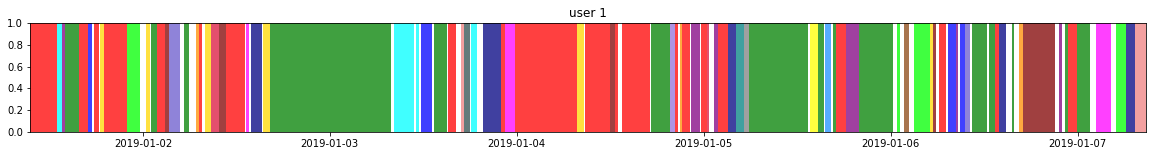

In [60]:
plot.plot_diary(c_an_agent[drange], 1)

In [16]:
c_an_agent.head()

,uid,datetime,lat,lng,leaving_datetime,cluster
0,1,2019-01-01 08:00:00.000000,46.197782,11.067260,2019-01-01 08:56:07.162844,0
1,1,2019-01-01 08:56:07.162844,45.918015,11.108424,2019-01-01 09:39:39.703781,11
2,1,2019-01-01 09:39:39.703781,46.197782,11.067260,2019-01-01 10:07:38.239524,0
3,1,2019-01-01 10:27:29.899347,45.918015,11.108424,2019-01-01 11:00:37.971061,11
4,1,2019-01-01 11:00:37.971061,46.197782,11.067260,2019-01-01 11:34:54.128315,0


In [8]:
from skmob.measures.individual import jump_lengths, radius_of_gyration, waiting_times

In [9]:
jls_df = jump_lengths(tdf)
jls_df

,uid,jump_lengths
0,1,"[0.0, 0.0, 5.827680703554019, 3.98870102447156..."
1,2,"[0.0, 0.0, 1.0003968418697207, 0.0, 35.3428228..."
2,3,"[4.99488677600032, 30.869387060754963, 25.9297..."
3,4,"[0.0, 0.0, 1.4127682862687783, 2.8255459411413..."
4,5,"[0.0, 0.0, 2.2312568211914194, 0.0, 0.0, 2.231..."
5,6,"[0.0, 1.0004572512694057, 1.0004572512694057, ..."
6,7,"[0.9973927859710426, 0.9973927859710426, 0.0, ..."
7,8,"[1.0004320213559283, 0.0, 1.0004320213559283, ..."
8,9,"[4.236881560989682, 4.236881560989682, 4.23688..."
9,10,"[34.43058989696243, 2.2312132065839916, 2.2358..."


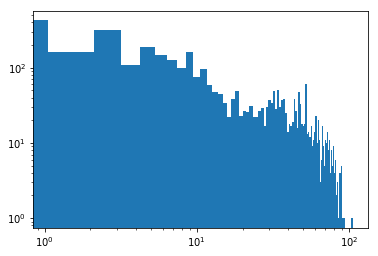

In [10]:
jls = []
for x in jls_df.jump_lengths:
    jls.extend(x)

plt.hist(jls, bins=100)
plt.loglog()
plt.show()

In [12]:
wts_df = waiting_times(tdf)
wts_df

,uid,waiting_times
0,1,"[1301.0, 699.0, 935.0, 948.0, 758.0, 637.0, 83..."
1,2,"[888.0, 722.0, 1633.0, 9685.0, 1049.0, 25080.0..."
2,3,"[611.0, 1043.0, 4880.0, 1646.0, 1789.0, 769.0,..."
3,4,"[1603.0, 755.0, 4080.0, 1425.0, 19784.0, 2878...."
4,5,"[833.0, 2450.0, 2832.0, 1458.0, 1064.0, 1760.0..."
5,6,"[1045.0, 1171.0, 5252.0, 13485.0, 738.0, 4009...."
6,7,"[671.0, 9058.0, 4293.0, 1289.0, 608.0, 2106.0,..."
7,8,"[2123.0, 2105.0, 2085.0, 604.0, 1815.0, 673.0,..."
8,9,"[1367.0, 1375.0, 3123.0, 673.0, 4545.0, 808.0,..."
9,10,"[704.0, 1099.0, 961.0, 1725.0, 722.0, 1028.0, ..."


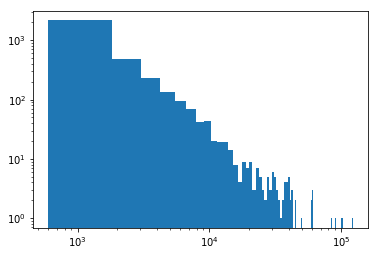

In [13]:
wts = []
for x in wts_df.waiting_times:
    wts.extend(x)

plt.hist(wts, bins=100)
plt.loglog()
plt.show()

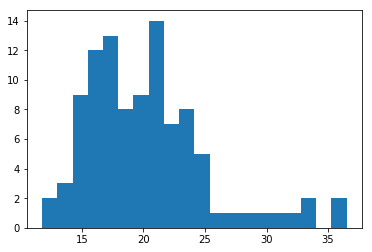

In [21]:
rg_df = radius_of_gyration(tdf)
plt.hist(rg_df.radius_of_gyration.values, bins=20)
plt.show()

## Ditras

In [1]:
%matplotlib inline
import skmob as sm
from skmob.utils import utils, plot, constants

from geopy.distance import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skmob.core.trajectorydataframe import TrajDataFrame

In [2]:
from skmob.models.epr import Ditras
from skmob.models.markov_diary_generator import MarkovDiaryGenerator
from skmob.models.epr import load_spatial_tessellation, compute_od_matrix

In [3]:
start_time, end_time = pd.to_datetime('2019/01/01 08:00:00'), pd.to_datetime('2019/01/14 08:00:00')

In [3]:
spatial_tessellation = load_spatial_tessellation('../data_test/location2info_trentino')

6259it [00:00, 165459.59it/s]


In [5]:
cstdf = utils.read_json('/Users/fs13378/Desktop/brightkite_clustered_stops.json')

In [6]:
cstdf.dtypes

lat                        float64
lng                        float64
datetime            datetime64[ns]
uid                          int64
leaving_datetime             int64
cluster                      int64
dtype: object

In [7]:
cstdf.rename(columns={'cluster':'location'}, inplace=True)

In [8]:
cstdf[:3]

,lat,lng,datetime,uid,leaving_datetime,location
0,39.978253,116.327275,2008-10-23 06:01:05,1,1224757973000,0
1,40.013819,116.306532,2008-10-23 11:10:09,1,1224805562000,1
2,39.978987,116.326686,2008-10-24 00:10:39,1,1224812937000,0


In [10]:
cstdf['datetime'].max() - cstdf['datetime'].min()

Timedelta('146 days 23:01:42')

In [13]:
data_set = [[1,39.984094,116.319236,'2008-10-23 00:00:00',0],
[1,39.984198,116.319322,'2008-10-23 08:00:00',1],
[1,39.984198,116.319322,'2008-10-23 12:00:00',2],
[1,39.984198,116.319322,'2008-10-23 14:00:00',1],
[1,39.984224,116.319402,'2008-10-23 18:00:00',0]]

tdf2 = TrajDataFrame(data_set, latitude=1, longitude=2, datetime=3, user_id=0)
tdf2.rename(columns={4: "location"}, inplace=True)

tdf2.head()

,uid,lat,lng,datetime,location
0,1,39.984094,116.319236,2008-10-23 00:00:00,0
1,1,39.984198,116.319322,2008-10-23 08:00:00,1
2,1,39.984198,116.319322,2008-10-23 12:00:00,2
3,1,39.984198,116.319322,2008-10-23 14:00:00,1
4,1,39.984224,116.319402,2008-10-23 18:00:00,0


In [14]:
mdg = MarkovDiaryGenerator()

In [15]:
mdg.fit(tdf2, 1)#, pd.to_datetime('2008-10-23 06:00:00'), pd.to_datetime('2008-10-30 06:00:00') )


100%|██████████| 1/1 [00:00<00:00, 37.86it/s]


In [10]:
(23+8)%24

7

In [11]:
mdg.generate(24*3, pd.to_datetime('2019/01/01 00:00:00'))

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (17, 0), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (17, 0), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (17, 0), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (0, 1)]
new diary
 [[Timestamp('2019-01-01 00:00:00'), 0], [Timestamp('2019-01-01 01:00:00'), 0], [Timestamp('2019-01-01 02:00:00'), 0], [Timestamp('2019-01-01 03:00:00'), 0], [Timestamp('2019-01-01 04:00:00'), 0], [Timestamp('2019-01-01 05:00:00'), 0], [Timestamp('2019-01-01 06

,datetime,abstract_location
0,2019-01-01 00:00:00,0
1,2019-01-01 08:00:00,1
2,2019-01-01 18:00:00,0
3,2019-01-02 08:00:00,1
4,2019-01-02 18:00:00,0
5,2019-01-03 08:00:00,1
6,2019-01-03 18:00:00,0


In [15]:
[[[k,kk] for kk,vv in v.items() if vv>0] for k,v in mdg._markov_chain_.items()]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[(7, 0), (8, 1)]],
 [],
 [],
 [[(8, 1), (9, 1)]],
 [],
 [[(9, 1), (10, 1)]],
 [],
 [[(10, 1), (11, 1)]],
 [],
 [[(11, 1), (12, 1)]],
 [],
 [[(12, 1), (13, 1)]],
 [],
 [[(13, 1), (14, 1)]],
 [],
 [[(14, 1), (15, 1)]],
 [],
 [[(15, 1), (16, 1)]],
 [],
 [[(16, 1), (17, 1)]],
 [],
 [[(17, 1), (7, 0)]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [43]:
import random

In [53]:
sum([np.searchsorted(np.cumsum([0.,0.]), random.random()) for i in range(100)])

200

In [42]:
[[[k,kk, vv] for kk,vv in v.items() if vv>0] for k,v in mdg._markov_chain_.items()]

[[],
 [[(0, 1), (1, 1), 1.0]],
 [],
 [[(1, 1), (2, 1), 1.0]],
 [],
 [[(2, 1), (3, 1), 1.0]],
 [],
 [[(3, 1), (4, 1), 1.0]],
 [],
 [[(4, 1), (5, 1), 1.0]],
 [],
 [[(5, 1), (6, 1), 1.0]],
 [],
 [[(6, 1), (7, 1), 1.0]],
 [],
 [[(7, 1), (17, 0), 1.0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[(17, 0), (18, 1), 1.0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [41]:
mdg._markov_chain_

defaultdict(<function skmob.models.markov_diary_generator.MarkovDiaryGenerator._create_empty_markov_chain.<locals>.<lambda>()>,
            {(0, 0): defaultdict(float,
                         {(0, 0): 0.0,
                          (0, 1): 0.0,
                          (1, 0): 0.0,
                          (1, 1): 0.0,
                          (2, 0): 0.0,
                          (2, 1): 0.0,
                          (3, 0): 0.0,
                          (3, 1): 0.0,
                          (4, 0): 0.0,
                          (4, 1): 0.0,
                          (5, 0): 0.0,
                          (5, 1): 0.0,
                          (6, 0): 0.0,
                          (6, 1): 0.0,
                          (7, 0): 0.0,
                          (7, 1): 0.0,
                          (8, 0): 0.0,
                          (8, 1): 0.0,
                          (9, 0): 0.0,
                          (9, 1): 0.0,
                          (10, 0): 0.0,
            

In [24]:
start_time, end_time = pd.to_datetime('2019/01/01 00:00:00'), pd.to_datetime('2019/01/28 00:00:00')
ditras = Ditras(mdg)
tdf2 = ditras.generate(start_time, end_time, spatial_tessellation, 
                       n_agents=1, od_matrix=None, verbose=True)


  0%|          | 0/10 [00:00<?, ?it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 10%|█         | 1/10 [00:00<00:04,  2.17it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 20%|██        | 2/10 [00:00<00:03,  2.16it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 30%|███       | 3/10 [00:01<00:03,  2.32it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 40%|████      | 4/10 [00:01<00:02,  2.32it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 50%|█████     | 5/10 [00:02<00:02,  2.13it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 60%|██████    | 6/10 [00:02<00:02,  1.90it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 70%|███████   | 7/10 [00:03<00:01,  1.99it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 80%|████████  | 8/10 [00:03<00:00,  2.01it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

 90%|█████████ | 9/10 [00:04<00:00,  2.08it/s]

(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(23, 1) 23 (0, 1)
(18, 1) 18 (19, 1)
(19, 1) 19 (20, 1)
(20, 1) 20 (21, 1)
(21, 1) 21 (22, 1)
(22, 1) 22 (23, 1)
(

100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


In [22]:
tdf2[:30]

,uid,datetime,lat,lng
0,1,2019-01-01 00:00:00,46.300792,11.733398
1,1,2019-01-01 08:00:00,46.353474,11.788018
2,1,2019-01-01 12:00:00,46.408354,11.751782
3,1,2019-01-01 14:00:00,46.300792,11.733398
4,1,2019-01-01 18:00:00,46.300792,11.733398
5,1,2019-01-02 08:00:00,46.300792,11.733398
6,1,2019-01-02 12:00:00,46.300792,11.733398
7,1,2019-01-02 14:00:00,46.300792,11.733398
8,1,2019-01-02 18:00:00,46.300792,11.733398
9,1,2019-01-03 08:00:00,46.311315,11.668982


In [10]:
tdf2.parameters

{'model': {'class': <function skmob.models.epr.Ditras.__init__(self, diary_generator, rho=0.6, gamma=0.21, name='Ditras model')>,
  'generate': {'start_date': Timestamp('2019-01-01 00:00:00'),
   'end_date': Timestamp('2019-01-28 00:00:00'),
   'n_agents': 1,
   'starting_location': None,
   'random_state': None}}}

In [8]:
from skmob.preprocessing import detection, clustering
from skmob.utils import plot

In [17]:
an_agent = tdf2[tdf2.uid == 1]
# an_agent.plot_trajectory(hex_color='#000000')

In [18]:
s_an_agent = detection.stops(an_agent)
c_an_agent = clustering.cluster(s_an_agent)

In [19]:
map_s_an_agent = an_agent.plot_trajectory(hex_color='#666666')
plot.plot_stops(c_an_agent, map_f=map_s_an_agent)

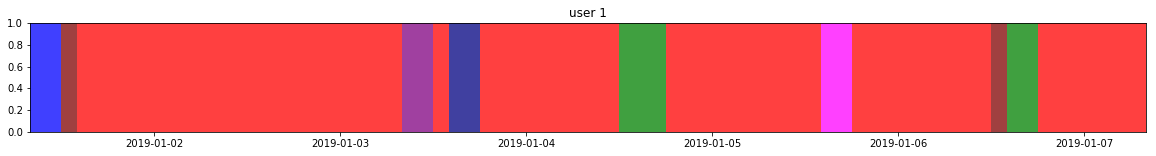

In [23]:
drange = ((c_an_agent['datetime'] > pd.to_datetime('2019/01/01 00:00:00')) &
          (c_an_agent['datetime'] < pd.to_datetime('2019/01/07 00:00:00')))

plot.plot_diary(c_an_agent[drange], 1)

In [21]:
c_an_agent#.head()

,uid,datetime,lat,lng,leaving_datetime,cluster
0,1,2019-01-01 00:00:00,46.300792,11.733398,2019-01-01 08:00:00,0
1,1,2019-01-01 08:00:00,46.353474,11.788018,2019-01-01 12:00:00,9
2,1,2019-01-01 12:00:00,46.408354,11.751782,2019-01-01 14:00:00,3
3,1,2019-01-01 14:00:00,46.300792,11.733398,2019-01-03 08:00:00,0
4,1,2019-01-03 08:00:00,46.311315,11.668982,2019-01-03 12:00:00,6
5,1,2019-01-03 12:00:00,46.300792,11.733398,2019-01-03 14:00:00,0
6,1,2019-01-03 14:00:00,46.461660,11.780516,2019-01-03 18:00:00,2
7,1,2019-01-03 18:00:00,46.300792,11.733398,2019-01-04 12:00:00,0
8,1,2019-01-04 12:00:00,46.320002,11.682394,2019-01-04 18:00:00,1
9,1,2019-01-04 18:00:00,46.300792,11.733398,2019-01-05 14:00:00,0


In [18]:
c_an_agent[drange].leaving_datetime.max()
#     if end_datetime is None:
#         end_datetime = df.leaving_datetime.max()

NaT

In [49]:

from folium.plugins import HeatMap

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'openstreetmap', zoom_start=10, control_scale=True)

# Add heatmap to map instance
# Available parameters: HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
HeatMap(homes).add_to(m)

# Alternative syntax:
#m.add_child(HeatMap(points_array, radius=15))

# Show map
m